Showcase_Notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
import requests
import pandas as pd
from io import BytesIO
from zipfile import ZipFile

class Airplane:
    """
    A class to download airplane data and perform analysis on it.
    """

    def __init__(self):
        self.airlines_df = pd.DataFrame()
        self.airplanes_df = pd.DataFrame()
        self.airports_df = pd.DataFrame()
        self.routes_df = pd.DataFrame()
        self.merge_df = pd.DataFrame()

    def download_data(self):
        """
        Checks for a 'downloads' folder and creates it if it doesn't exist.
        Downloads flight data from a GitHub repository as a zip file, saves it,
        extracts the contents, and creates Pandas DataFrames from the CSV files:
        - airlines.csv
        - airplanes.csv
        - airports.csv
        - routes.csv
        """
        
        downloads_dir = "downloads"
        if not os.path.exists(downloads_dir):
            os.makedirs(downloads_dir)

        zip_file_path = os.path.join(downloads_dir, "flight_data.zip")

        '''
        Check if the zip file was already downloaded
        '''
        if not os.path.exists(zip_file_path):
            response = requests.get(
                "https://gitlab.com/adpro1/adpro2024/-/"
                "raw/main/Files/flight_data.zip?inline=false",
                stream=True
            )
            '''
            Ensure the request is successful
            '''
            if response.status_code == 200:
                with open(zip_file_path, "wb") as f:
                    f.write(response.content)

        '''
        Extract files if the zip file is downloaded
        '''
        if os.path.exists(zip_file_path):
            with ZipFile(zip_file_path, 'r') as zip_ref:
                zip_ref.extractall(downloads_dir)

                '''
                Loading data into DataFrames
                '''
                self.airlines_df = pd.read_csv(os.path.join(downloads_dir, 'airlines.csv'))
                self.airplanes_df = pd.read_csv(os.path.join(downloads_dir, 'airplanes.csv'))
                self.airports_df = pd.read_csv(os.path.join(downloads_dir, 'airports.csv'))
                self.routes_df = pd.read_csv(os.path.join(downloads_dir, 'routes.csv'))

        '''
        Print the first 5 lines of each dataset
        '''
        print("Airlines DataFrame:\n", self.airlines_df.head())
        print("\nAirplanes DataFrame:\n", self.airplanes_df.head())
        print("\nAirports DataFrame:\n", self.airports_df.head())
        print("\nRoutes DataFrame:\n", self.routes_df.head())

        print("\nDownloaded data executed!")

    def merge_datasets(self) -> pd.DataFrame:
        merge_df_1 = pd.merge(self.routes_df, self.airports_df, left_on="Source airport", right_on="IATA")
        merge_df_1 = merge_df_1.rename(columns={'Country': 'Source country'})
    
        merge_df_2 = pd.merge(merge_df_1, self.airports_df[['IATA', 'Country']], left_on='Source airport', right_on='IATA')
        merge_df_2 = merge_df_2.rename(columns={'Country': 'Destination country'})
    
        merge_df = merge_df_2.dropna(subset=['Source country', 'Destination country'])

        # Assign the resulting merge_df to the instance variable
        self.merge_df = merge_df
    
        return self.merge_df

    def plot_flights_by_code_airports(self, code_airport, n: int = 5, internal=False):
    # Assuming 'merge' is an attribute of the class and should be referenced with self.merge
        country_of_source = self.merge.loc[self.merge['Source airport'] == code_airport, 'Source country'].iloc[0]

        if internal:
        # Plot only internal flights
            internal_routes = self.merge_df[
                (self.merge_df["Source airport"] == code_airport)
                & (self.merge_df["Destination airport"] == code_airport)
            ]
        # Limit to top n destination airports
            internal_routes["Destination airport"].value_counts().head(n).plot(
                kind="bar", title=f"Top {n} Internal Flights from {code_airport}"
            )
            
        else:
            # Plot all flights
            all_routes = self.merge_df[self.merge_df["Source airport"] == code_airport]
            # Limit to top n destination airports
            all_routes["Destination airport"].value_counts().head(n).plot(
                kind="bar", title=f"Top {n} Flights from {code_airport}"
            )

        plt.xlabel("Destination Airport")
        plt.ylabel("Number of Flights")
        plt.show()

    def plot_most_used_airplane_models(self, n: int = 5, countries=None):
        """
        Plot the most used airplane models based on the number of routes.

        Parameters:
            n (int): Number of airplane models to plot, that by default is 5.
            countries: Specific country or list of countries to consider, by default is None.
        """
        if countries is None:
            # Plot most used planes by route using the entire dataset
            top_airplanes = self.merge_df["Equipment"].value_counts().nlargest(n)
        else:
            # Plot most used planes by route for a specific country or list of countries
            if isinstance(countries, str):
                countries = [countries]

            filtered_routes = self.merge_df[self.merge_df["Source country"].isin(countries)]
            top_airplanes = filtered_routes["Equipment"].value_counts().nlargest(n)

        top_airplanes.plot(
            kind="bar", title=f"Top {n} Airplane Models by Number of Routes"
        )
        plt.xlabel("Airplane Model")
        plt.ylabel("Number of Routes")
        plt.show()

    def plot_flights_by_country(self, country_name, internal=False):
        """
        Plot flights leaving the country with a destination in the same country or all flights.

        Parameters:
            country_name (str): The name of the country.
            internal (bool): If True, plot only internal flights. If False, plot all flights. Default is False.
        """
        if internal is True:
            # Plot only internal flights
            internal_routes = self.merge_df[
                (self.merge_df["Source country"] == country_name)
                & (self.merge_df["Destination country"] == country_name)
            ]
            internal_routes["Destination country"].value_counts().plot(
                kind="bar", title=f"Internal Flights from {country_name}"
            )
        else:
            # Plot all flights
            all_routes = self.merge_df[(self.merge_df["Source country"] == country_name)]
            all_routes["Destination country"].value_counts().plot(
                kind="bar", title=f"All Flights from {country_name}"
            )

        plt.xlabel("Airplane Model")
        plt.ylabel("Number of Flights")
        plt.show()


In [4]:
#Test the method 1


In [5]:
#Test the method 2


In [6]:
#Test the method 3
# Create an instance of the Airplane class
airplane_instance = Airplane()

# Download and prepare the data
airplane_instance.download_data()

# Assuming the merge_datasets method correctly prepares the 'merge' attribute
airplane_instance.merge = airplane_instance.merge_datasets()

# Test the plot_flights_by_code_airports method
# Replace "YourAirportCode" with an actual code, e.g., "JFK" or "LAX"
airplane_instance.plot_flights_by_code_airports("JFK", internal=False)

In [7]:
#Test the method 4
# Assuming you have an instance of the RouteAnalyzer class
analyzer_instance = Airplane()

# Download and prepare the data
analyzer_instance.download_data()

# Assuming the merge_datasets method correctly prepares the 'merge' attribute
analyzer_instance.merge = analyzer_instance.merge_datasets()

# Plot for the entire dataset
analyzer_instance.plot_most_used_airplane_models()

# Plot for a specific country or list of countries
analyzer_instance.plot_most_used_airplane_models(countries='United States')

Airlines DataFrame:
    index  Airline ID                                          Name Alias IATA  \
0      0          -1                                       Unknown    \N    -   
1      1           1                                Private flight    \N    -   
2      2           2                                   135 Airways    \N  NaN   
3      3           3                                 1Time Airline    \N   1T   
4      4           4  2 Sqn No 1 Elementary Flying Training School    \N  NaN   

  ICAO Callsign         Country Active  
0  NaN       \N              \N      Y  
1  NaN      NaN             NaN      Y  
2  GNL  GENERAL   United States      N  
3  RNX  NEXTIME    South Africa      Y  
4  WYT      NaN  United Kingdom      N  

Airplanes DataFrame:
    index                                          Name IATA code ICAO code
0      0                       Aerospatiale (Nord) 262       ND2      N262
1      1  Aerospatiale (Sud Aviation) Se.210 Caravelle       CRV      S21

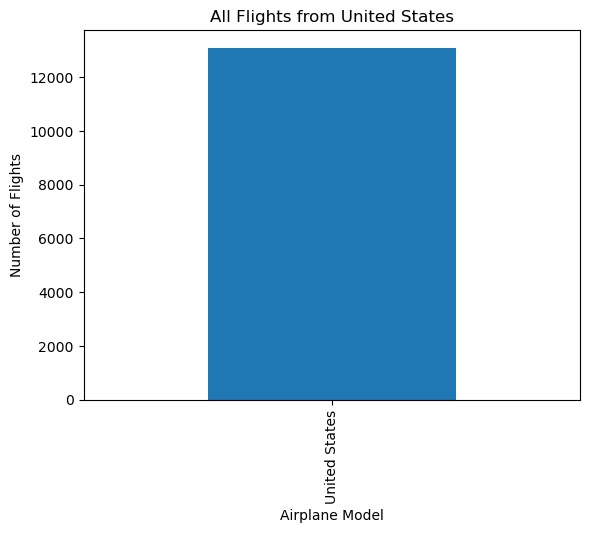

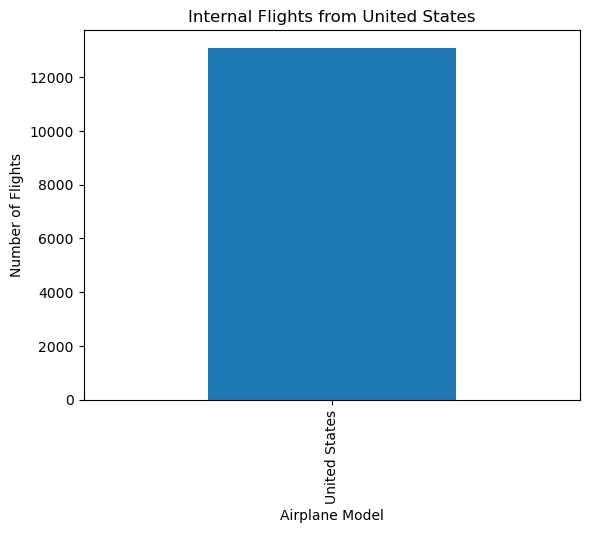

In [9]:
#Test the method 5
# Assuming you have an instance of the RouteAnalyzer class
route_analyzer = Airplane()

# Download and prepare the data
route_analyzer.download_data()

# Assuming the merge_datasets method correctly prepares the 'merge' attribute
route_analyzer.merge = route_analyzer.merge_datasets()

# Call the new method with a specific country (e.g., "United States") and the default internal value (False)
route_analyzer.plot_flights_by_country("United States")

# If you want to specify the internal value, you can do so like this:
route_analyzer.plot_flights_by_country("United States", internal=True)